In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


from keras.layers import Conv2D,MaxPooling2D,UpSampling2D,Dense,Flatten
from keras.layers import Input
from keras.models import Model,Sequential

from keras.preprocessing.image import img_to_array,load_img

Using TensorFlow backend.


In [2]:
train_noised = pd.read_csv('DirtyDocumentsDenoising/train_noised.csv')

In [3]:
print(train_noised.shape)

(144, 2)


In [25]:
def load_imgg(path):
    ret_arr = []
    for i in path:
        img = load_img(i,target_size=(240,240))
        img = img_to_array(img)
        img = img.astype('float32') / 255.
        ret_arr.append(img)
        
    return ret_arr

In [26]:
print(train_noised.head())

   Unnamed: 0  label                                      noised
0           0  1.png  DirtyDocumentsDenoising/train_noised/1.png
1           1  2.png  DirtyDocumentsDenoising/train_noised/2.png
2           2  3.png  DirtyDocumentsDenoising/train_noised/3.png
3           3  4.png  DirtyDocumentsDenoising/train_noised/4.png
4           4  5.png  DirtyDocumentsDenoising/train_noised/5.png


In [27]:
def noised_column(train_noised):
    noised = []
    for i in range(1,145):
        s = "DirtyDocumentsDenoising/train_noised/" + str(i) + ".png"
        noised.append(s)
    train_noised['noised'] = noised
    return train_noised
    


In [28]:
print(train_noised.head())

   Unnamed: 0  label                                      noised
0           0  1.png  DirtyDocumentsDenoising/train_noised/1.png
1           1  2.png  DirtyDocumentsDenoising/train_noised/2.png
2           2  3.png  DirtyDocumentsDenoising/train_noised/3.png
3           3  4.png  DirtyDocumentsDenoising/train_noised/4.png
4           4  5.png  DirtyDocumentsDenoising/train_noised/5.png


In [29]:
train_noised = noised_column(train_noised)
print(train_noised.head())

   Unnamed: 0  label                                      noised
0           0  1.png  DirtyDocumentsDenoising/train_noised/1.png
1           1  2.png  DirtyDocumentsDenoising/train_noised/2.png
2           2  3.png  DirtyDocumentsDenoising/train_noised/3.png
3           3  4.png  DirtyDocumentsDenoising/train_noised/4.png
4           4  5.png  DirtyDocumentsDenoising/train_noised/5.png


In [30]:
def plot_img(path1,path2):
    img1 = load_img(path1,target_size=(450,450))
    img2 = load_img(path2,target_size=(450,450))
    img1 = img_to_array(img1)
    img2 = img_to_array(img2)
    
    img1 = img1.astype('float32') / 255.
    img2 = img2.astype('float32') / 255.
    
    fig = plt.figure(figsize=(10,10))
    
    plt.subplot(2,2,1)
    plt.title("Img1")
    plt.imshow(img1)
    
    plt.subplot(2,2,2)
    plt.title("Img2")
    plt.imshow(img2)

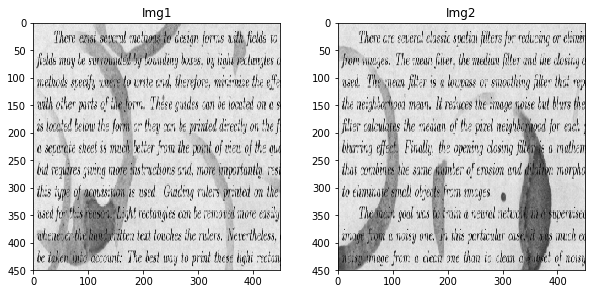

In [31]:
plot_img(train_noised['noised'][0],train_noised['noised'][1])

In [32]:
train_cleaned = pd.read_csv('DirtyDocumentsDenoising/train_noised.csv')

In [33]:
def cleaned_column(train_cleaned):
    cleaned = []
    for i in range(1,145,1):
        s = "DirtyDocumentsDenoising/train_cleaned/" + str(i) + ".png"
        cleaned.append(s)
    train_cleaned['cleaned'] = cleaned
    return train_cleaned


In [34]:
print("The train_cleaned without the path address is : ",train_cleaned.head())

The train_cleaned without the path address is :     Unnamed: 0  label
0           0  1.png
1           1  2.png
2           2  3.png
3           3  4.png
4           4  5.png


In [35]:
train_cleaned = cleaned_column(train_cleaned)
print("The train_cleaned with the path address is : ")
print(train_cleaned.head())

The train_cleaned with the path address is : 
   Unnamed: 0  label                                      cleaned
0           0  1.png  DirtyDocumentsDenoising/train_cleaned/1.png
1           1  2.png  DirtyDocumentsDenoising/train_cleaned/2.png
2           2  3.png  DirtyDocumentsDenoising/train_cleaned/3.png
3           3  4.png  DirtyDocumentsDenoising/train_cleaned/4.png
4           4  5.png  DirtyDocumentsDenoising/train_cleaned/5.png


In [36]:
train_noised_data = np.array(load_imgg(train_noised['noised']))

In [37]:
train_cleaned_data = np.array(load_imgg(train_cleaned['cleaned']))

In [38]:
print("The shape of the noised data is ",train_noised_data.shape)

The shape of the noised data is  (144, 240, 240, 3)


In [39]:
print("The shape of the cleaned data is : ",train_cleaned_data.shape)

The shape of the cleaned data is :  (144, 240, 240, 3)


In [40]:
def plot_direct_img(img1,img2):
    fig = plt.figure(figsize=(10,10))
    
    plt.subplot(2,2,1)
    plt.title("Img1")
    plt.imshow(img1)
    
    plt.subplot(2,2,2)
    plt.title("Img2")
    plt.imshow(img2)

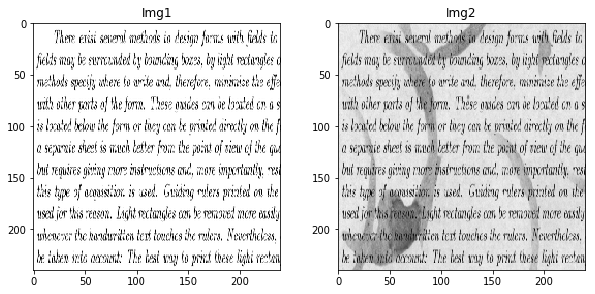

In [42]:
plot_direct_img(train_cleaned_data[0].reshape(240,240,3),train_noised_data[0].reshape(240,240,3))

## Dense Model

In [45]:
# data conversion into suitable format.....
train_noised1 = []
for i in train_noised_data:
    i = i.reshape(172800,)
    train_noised1.append(i)
    

In [46]:
train_noised1 = np.array(train_noised1)
print(train_noised1.shape)

(144, 172800)


In [47]:
train_cleaned1 = []
for i in train_cleaned_data:
    i = i.reshape(172800,)
    train_cleaned1.append(i)

In [48]:
train_cleaned1 = np.array(train_cleaned1)
print(train_cleaned1.shape)

(144, 172800)


In [49]:
img = Input(shape=(172800,))

encoder = Dense(128,activation='relu')(img)
encoder1 = Dense(64,activation='relu')(encoder)

decoder = Dense(64,activation='relu')(encoder1)
decoded = Dense(172800,activation='relu')(decoder)

In [50]:
autoencoder = Model(img,decoded)

In [51]:
autoencoder.compile(loss='binary_crossentropy',optimizer='adam')
autoencoder.fit(train_noised1,train_cleaned1,epochs=5,batch_size=32)

Epoch 1/5
144/144 [==============================] - 8s 52ms/step - loss: 6.3815
Epoch 2/5
144/144 [==============================] - 6s 41ms/step - loss: 5.3029
Epoch 3/5
144/144 [==============================] - 6s 41ms/step - loss: 5.0952
Epoch 4/5
144/144 [==============================] - 6s 41ms/step - loss: 4.9371
Epoch 5/5
144/144 [==============================] - 6s 41ms/step - loss: 4.8326


In [52]:
240*240*3

172800

In [53]:
print(autoencoder.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 172800)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               22118528  
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 172800)            11232000  
Total params: 33,362,944
Trainable params: 33,362,944
Non-trainable params: 0
_________________________________________________________________
None


In [54]:
train_noised_predicted = autoencoder.predict(train_noised1)

In [55]:
print(train_noised_predicted.shape)

(144, 172800)


In [57]:
train_noised_predicted = train_noised_predicted.reshape(144,240,240,3)

In [58]:
print(train_noised_predicted.shape)

(144, 240, 240, 3)


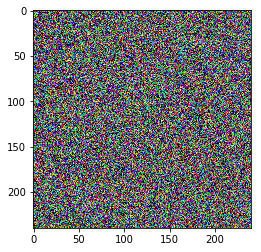

In [60]:
plt.imshow(train_noised_predicted[0].reshape(240,240,3))

## Convolutional Denoising

In [61]:
print(train_noised_data.shape)

(144, 240, 240, 3)


In [62]:
img = Input(shape=(240,240,3))

encoder = Conv2D(128,(3,3),activation='relu',padding='same')(img)
encoder1 = MaxPooling2D((2,2))(encoder)

encoder2 = Conv2D(64,(3,3),activation='relu',padding='same')(encoder1)
encoder3 = MaxPooling2D((2,2))(encoder2)


decoder = Conv2D(64,(3,3),activation='relu',padding='same')(encoder3)
decoder1 = UpSampling2D((2,2))(decoder)

decoder2 = Conv2D(128,(3,3),activation='relu',padding='same')(decoder1)
decoder3 = UpSampling2D((2,2))(decoder2)

decoded = Conv2D(3,(3,3),activation='sigmoid',padding='same')(decoder3)

In [63]:
autoencoder = Model(img,decoded)

In [ ]:
autoencoder.compile(loss='binary_crossentropy',optimizer='adam')
autoencoder.fit(train_noised_data,train_cleaned_data,epochs=5,batch_size=32)